In [1]:
#Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 200)



from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge,Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler



In [2]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#lets load the dataframe
housing=pd.read_csv('C:\\Users\\dell\\Downloads\\train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()#checking overall values and type of variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#checking some more statistical measures of numeric columns and overall it is evident that there are outliers in some variable 
#we will take care of that in EDA 
housing.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]).T


,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Id,1460.0,730.500000,421.610009,1.0,73.95,365.75,730.5,1095.25,1314.1,1387.05,1445.41,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,20.00,50.0,70.00,120.0,160.00,190.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,34.00,59.00,69.0,80.00,96.0,107.00,141.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,3311.70,7553.50,9478.5,11601.50,14381.7,17401.15,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,4.00,5.00,6.0,7.00,8.0,8.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,4.00,5.00,5.0,6.00,7.0,8.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1916.00,1954.00,1973.0,2000.00,2006.0,2007.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.00,1967.00,1994.0,2004.00,2006.0,2007.00,2009.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.00,0.0,166.00,335.0,456.00,791.92,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,0.00,383.5,712.25,1065.5,1274.00,1572.41,5644.0


# EDA - Explorartory Data Analysis
#### Let's understand and examine the data in order to get a clean dataset to work on further 

- we will deal with the Null values and impute it 
- we are going to look for the outlier and treat them to make the data clean 
- we will make make some **Visualization** to have a clear picture how the variables are behaving before proceeding to **Model building **.

For visualisation we are using `Matplotlib ` and `seaborn` 


In [7]:
''' Checking Null Values '''
#finding out the total null values and  null percentage in each column 

total = pd.DataFrame(housing.isnull().sum().sort_values(ascending=False), columns=['Total_null'])
percentage = pd.DataFrame(round(100*(housing.isnull().sum()/housing.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Null_Percentage'])
pd.concat([total, percentage], axis = 1)

,Total_null,Null_Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


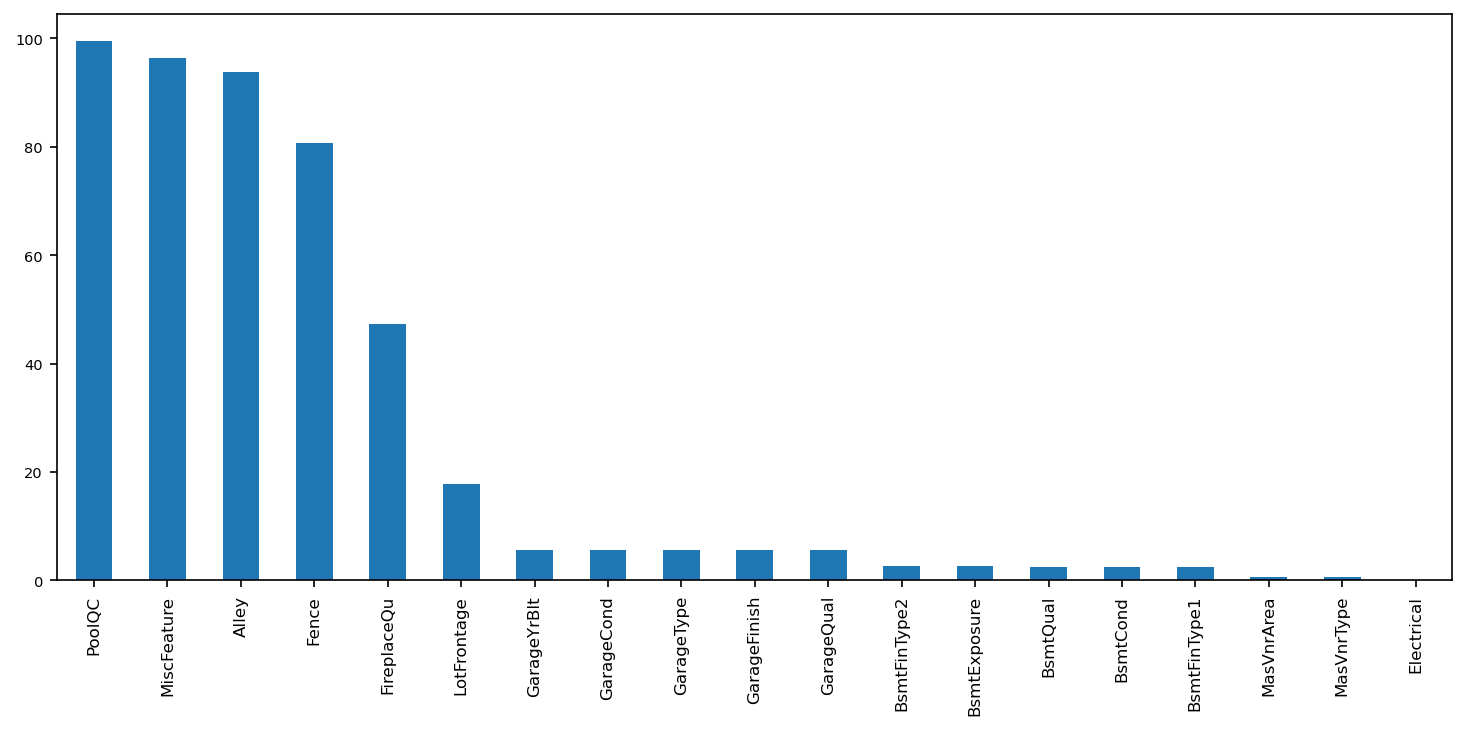

In [8]:
#visualising the percentage null in each columns distributions 
null_data=round(housing.isnull().sum()/len(housing)*100,2).sort_values(ascending=False)
plt.figure(figsize=[12,5],dpi=150)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=7)
null_data = null_data[null_data>0]
null_data.plot.bar()
plt.show()


### Insights from Null Values 

- From both the table and visualization it is clear that there are few columns which contains high Null values i. more than 80 %,they are as follows 


                   `PoolQC`
                   `MiscFeature
                   `Alley`
                   `Fence`
- we will drop these columns 
- The remaining columns which have Null values under 20 percent we are going to examine them and do the imputation further .
    
### Now delve into the data set and understand it separately for `Numerical Columns ` and `Categorical Columns`.



In [9]:
#making all numeric columns( integer and float ) in one dataset 
housing_num = housing.select_dtypes(include=['float64', 'int64'])
print(housing_num.shape)
housing_num.head()



(1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# making all Categoric variables(object type ) in one  dataset
housing_obj = housing.select_dtypes(exclude=['float64', 'int64'])
print(housing_obj.shape)
housing_obj.head()


(1460, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


- There are 38 numerical columns and 43 non-numeric or object type columns present in the dataset 

## Understanding Numerical Columns 

### Imputation of Numerical Columns 

In [11]:
#checking the null values before imputation present in the numerical dataframe 

for column in housing_num.columns.values:
    if housing_num[column].isnull().values.sum() != 0:
        missing_percentage=housing_num[column].isnull().values.sum()/len(housing_num)
        print(column, missing_percentage)

LotFrontage 0.1773972602739726
MasVnrArea 0.005479452054794521
GarageYrBlt 0.05547945205479452


In [12]:
housing_num[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [13]:
#Imputing `LotFrontage`,`MasVnrArea`,`GarageYrBlt` with  mean values 

housing_num['LotFrontage'].fillna(housing_num['LotFrontage'].mean(),inplace=True) 
housing_num['MasVnrArea'].fillna(housing_num['MasVnrArea'].mean(),inplace=True)   
housing_num['GarageYrBlt'].fillna(housing_num['GarageYrBlt'].mean(),inplace=True) 

In [14]:
#Rechecking the Null values present int he dataset after imputation 

housing_num.isnull().sum()


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

- there are no more null values in the numeric dataset 

### Let's check the value counts in each column 

In [15]:
housing_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [16]:
for i in housing_num:
    print(i,':\n',housing_num[i].value_counts(dropna=False),sep='',end='\n--------------------------\n\n')

Id:
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
--------------------------

MSSubClass:
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
--------------------------

LotFrontage:
70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
75.000000      53
65.000000      44
85.000000      40
78.000000      25
21.000000      23
90.000000      23
68.000000      19
64.000000      19
24.000000      19
73.000000      18
55.000000      17
79.000000      17
63.000000      17
72.000000      17
100.000000     16
51.000000      15
66.000000      15
74.000000      15
52.000000      14
59.000000      13
82.000000      12
57.000000      12
71.000000      12
43.000000      12
40.000000      12
67.000000      12
76.000000     

 `1.From the above observation we can conclude that ``ID`` is contains unique values and not essential for the modeling so we can drop it .`

-`` 2.there are few columns which have only some discrete values so it can be categorised ,so we need to change its data type from `int` to `obj``

In [17]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [18]:
housing_num.drop(columns=['Id'],inplace=True)


### Descriptive analysis of target variable " SalePrice"

- `SalePrice` is our target varible and we need to check certain things about it before proceeding further .
-  we need to check the distibution of the dependednt variable must be following `normal distribution` in order tto satisfy the assumptions of `Linear Regression` .
- we can check this by visualizing it in `dist plot`.

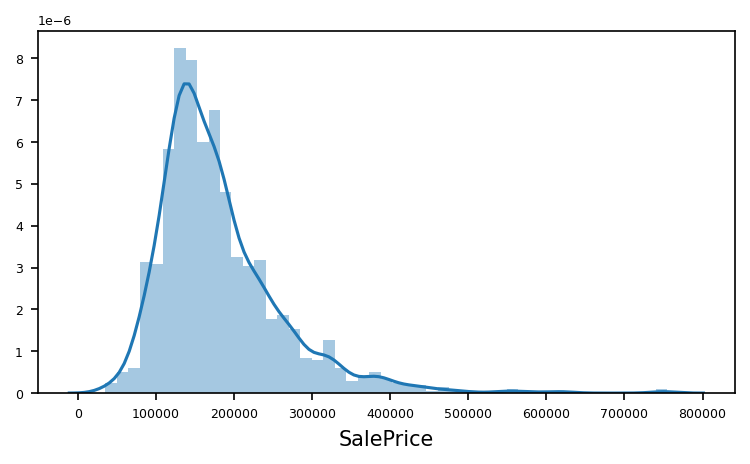

In [19]:
plt.figure(figsize=(6,3.2),dpi=150)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

sns.distplot(housing_num['SalePrice'])
plt.show()



   - we can see that `SalePrice` is rightly skewed.
   - we need to transform it with `log` to make it rightly distributed normally and perform `linear regression`

In [20]:
#log transforming the  predictor variable
housing_num['SalePrice'] = np.log1p(housing_num['SalePrice'])

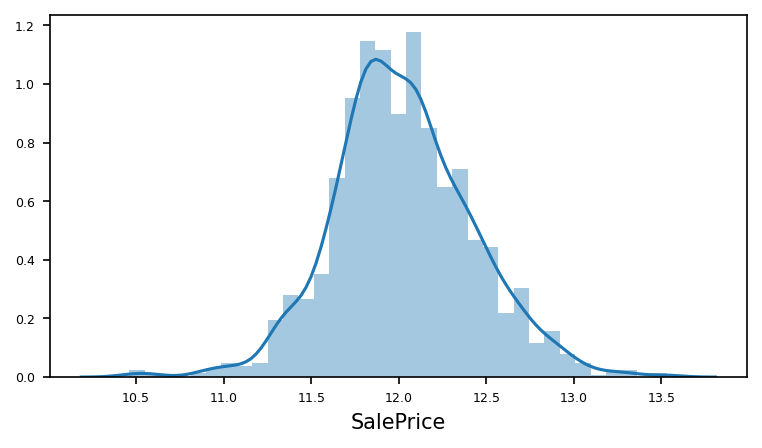

In [21]:
#checking post -trasnform 
plt.figure(figsize=(6,3.2),dpi=150)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)
sns.distplot(housing_num['SalePrice'])
plt.show()


- Now the target variable is rightly skewed 

### Now let's check outliers in the dataframe 
- we will visualize with boxplot 


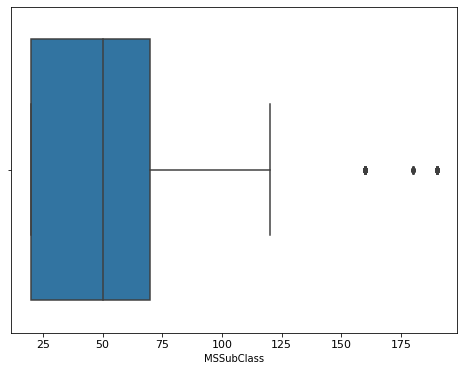

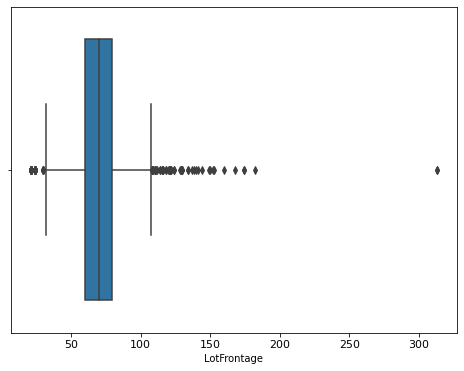

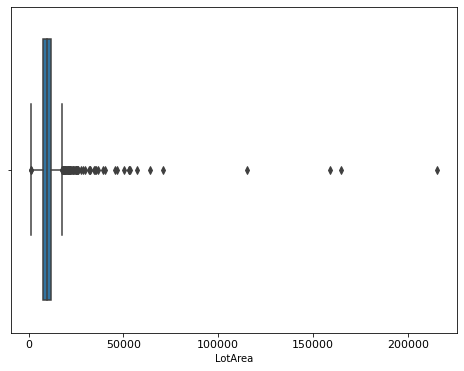

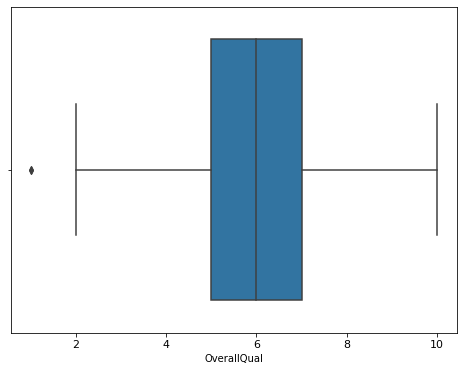

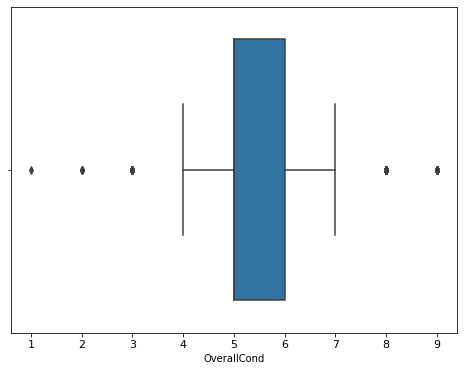

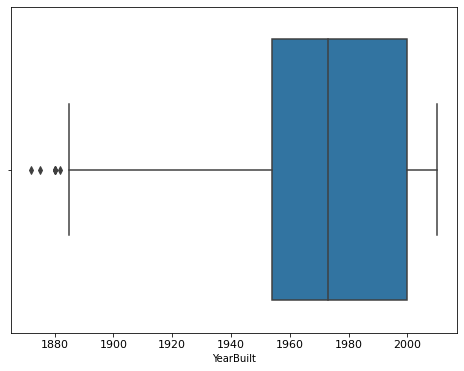

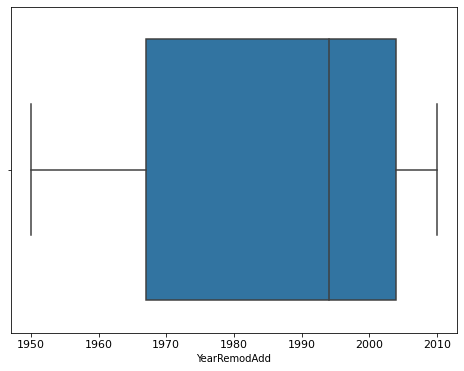

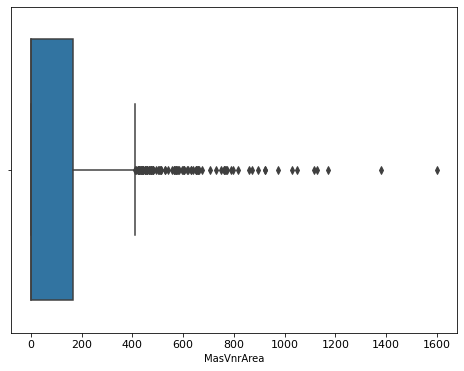

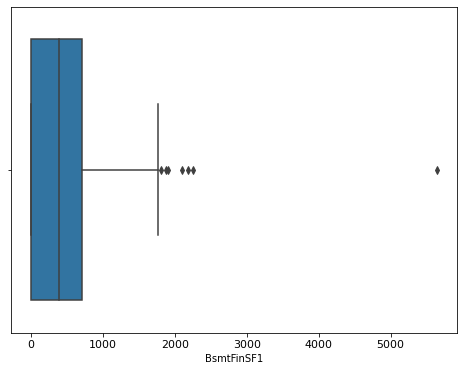

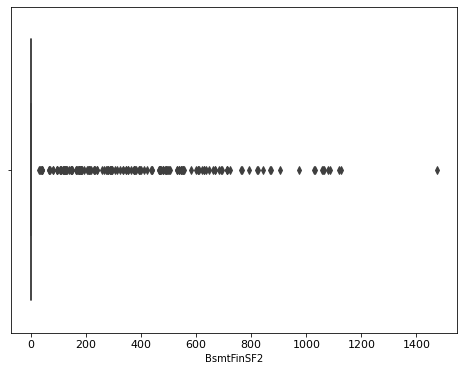

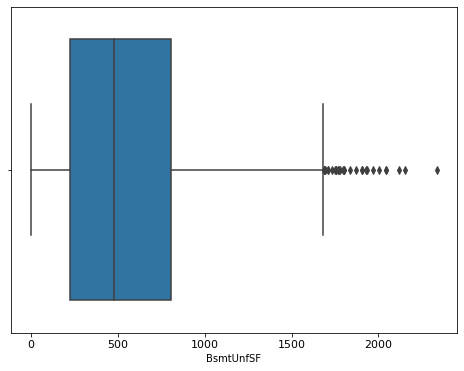

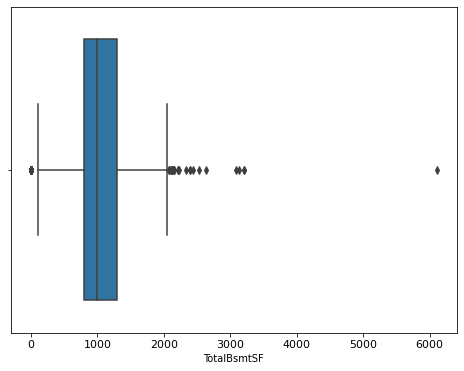

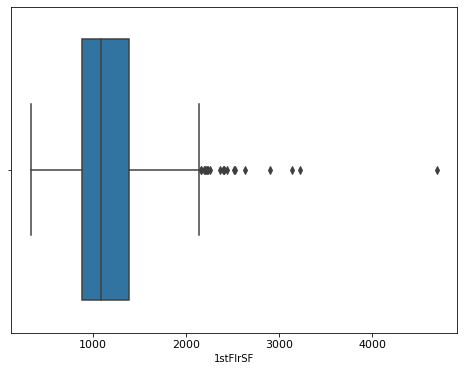

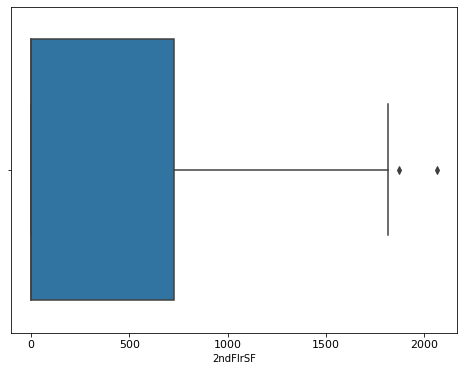

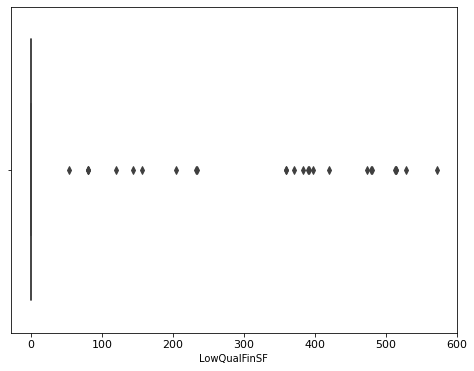

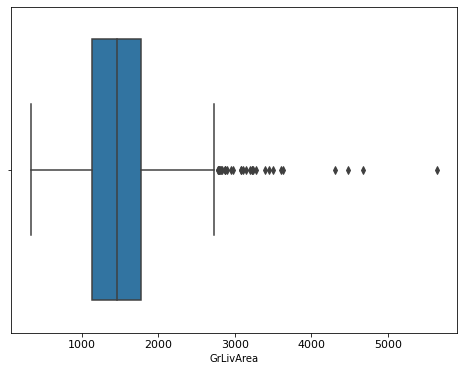

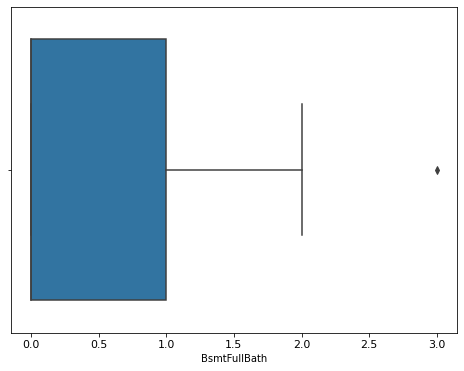

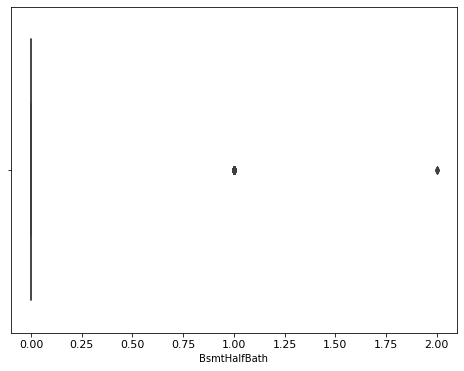

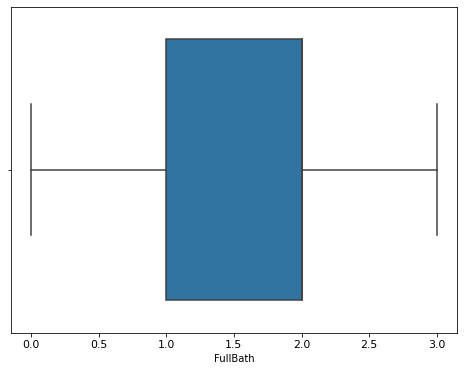

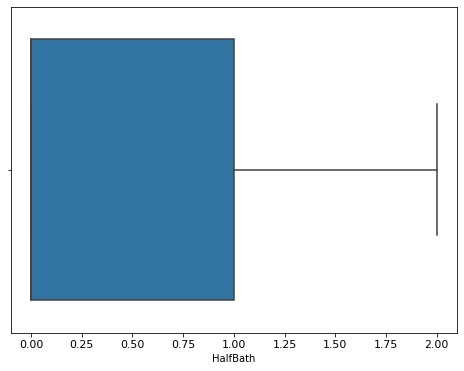

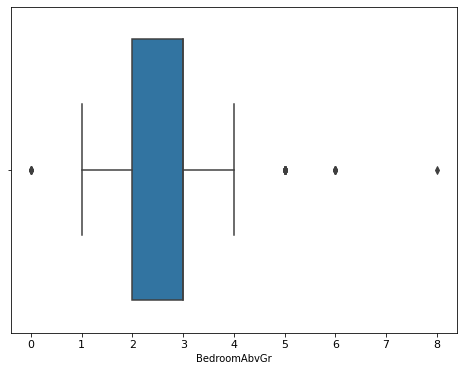

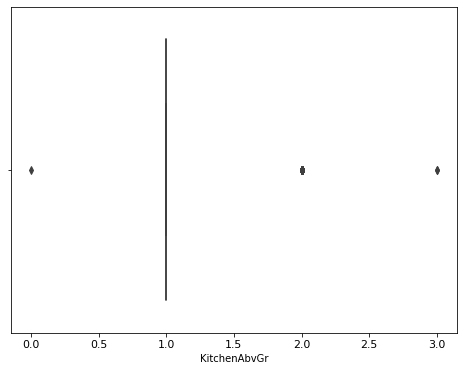

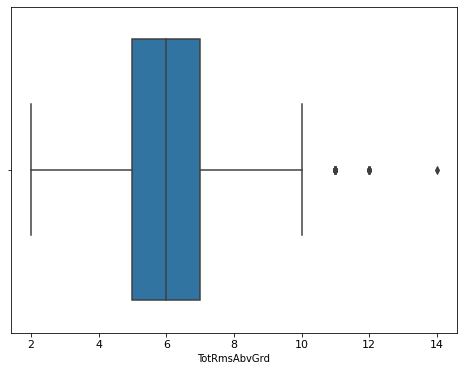

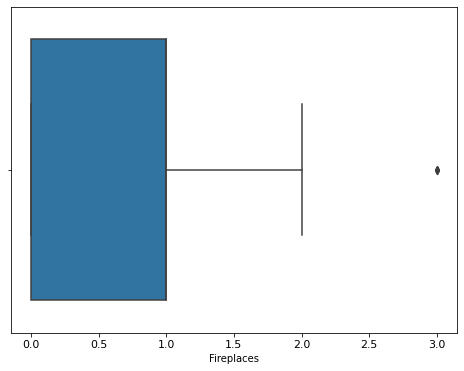

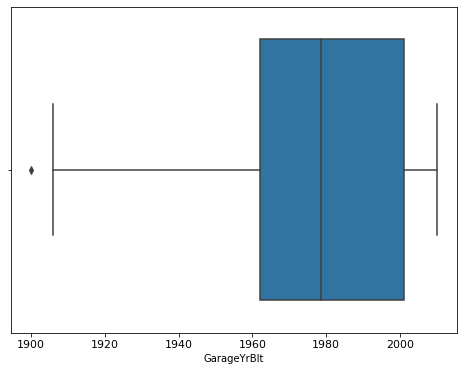

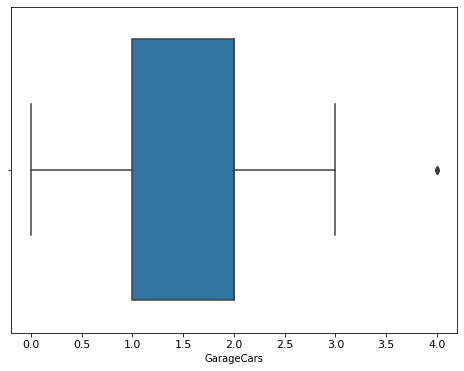

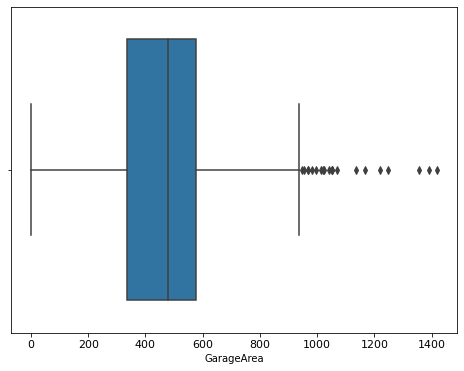

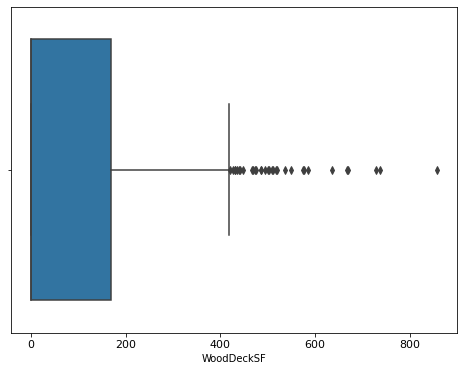

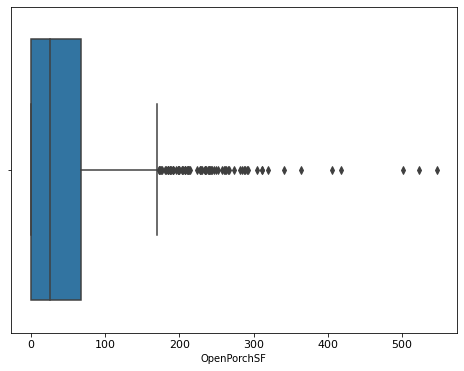

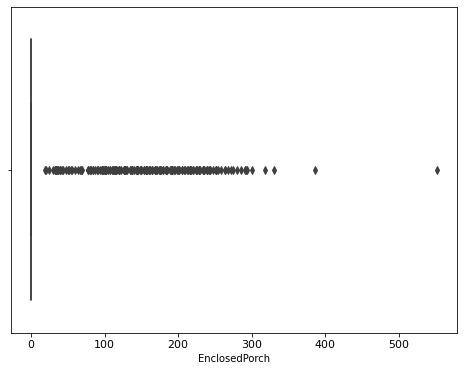

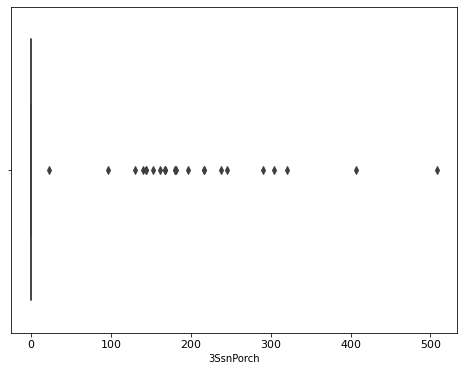

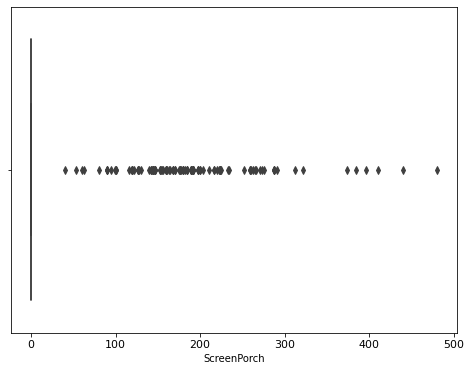

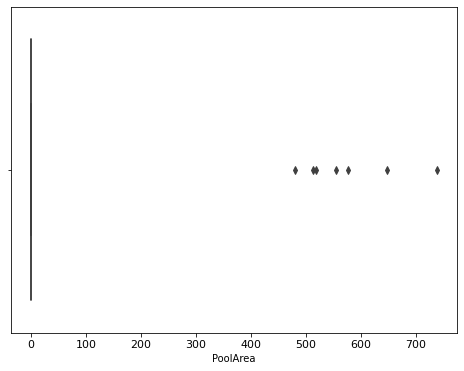

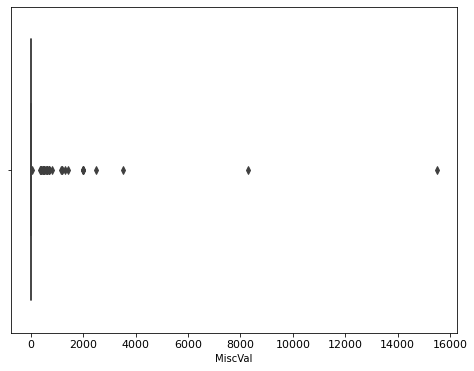

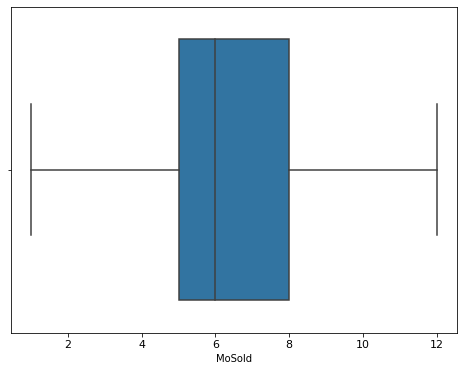

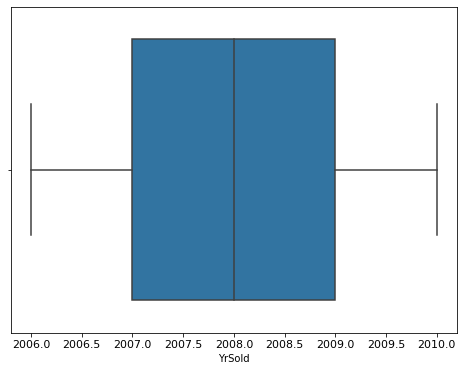

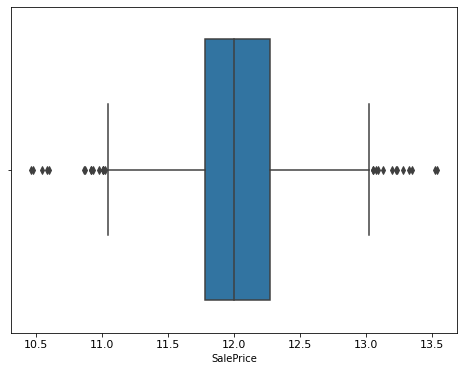

In [22]:
for values in housing_num:  
    plt.figure(figsize=(8,6))
    plt.rc('xtick', labelsize=11)
    plt.rc('ytick', labelsize=11)
    sns.boxplot(x=values,data=housing_num)
plt.show()

### lets first check  if there is any relatioship going on with target variable visually by scatter plot 

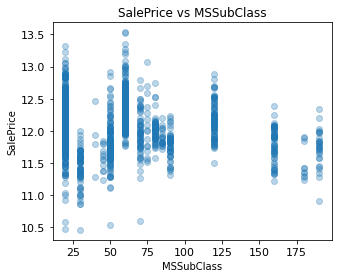

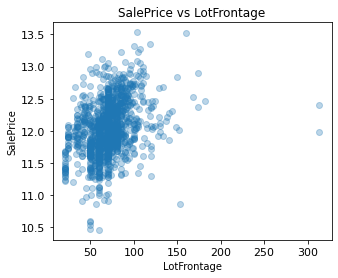

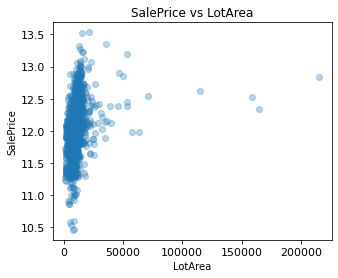

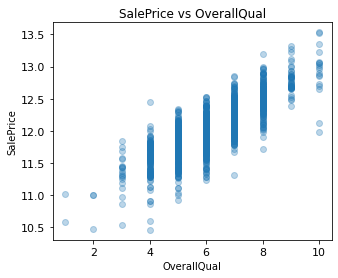

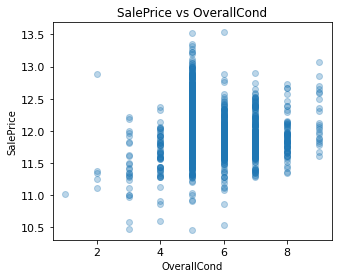

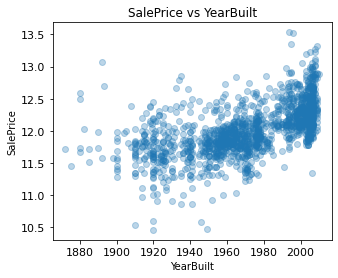

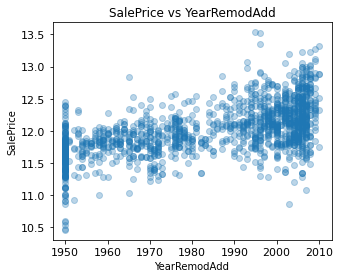

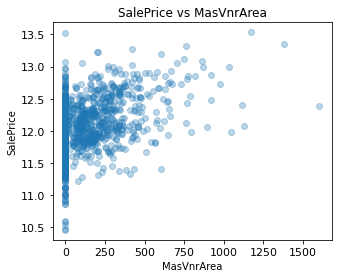

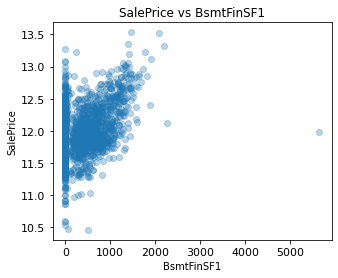

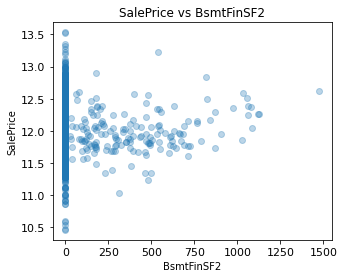

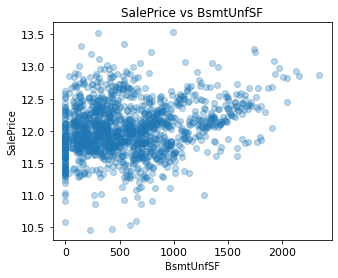

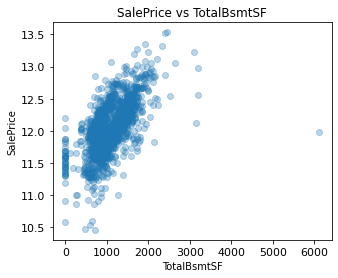

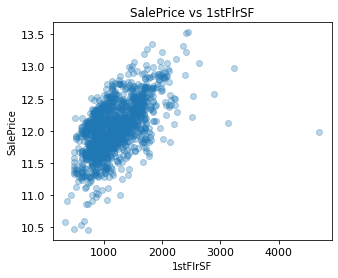

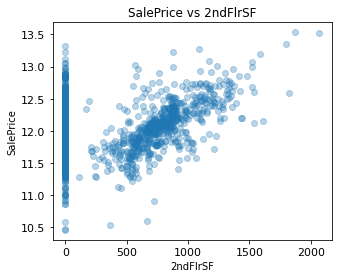

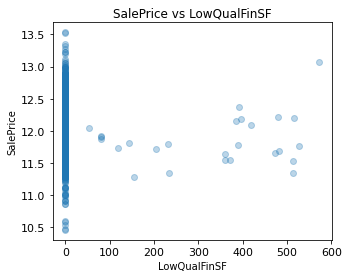

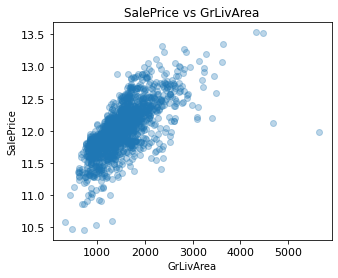

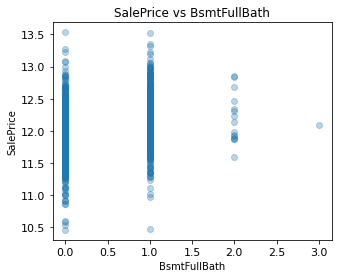

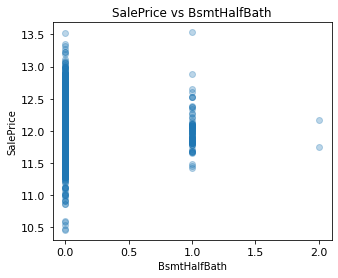

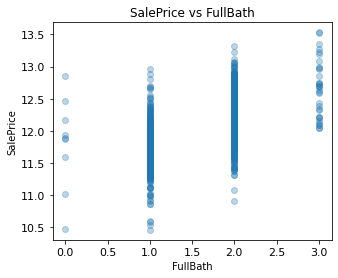

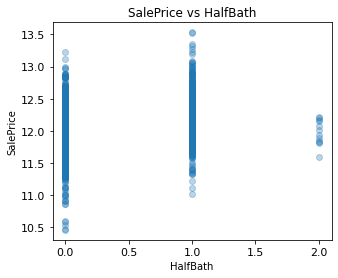

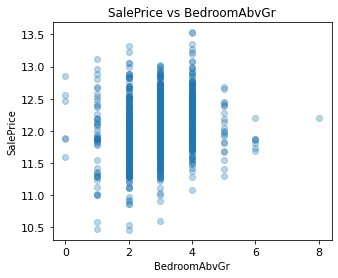

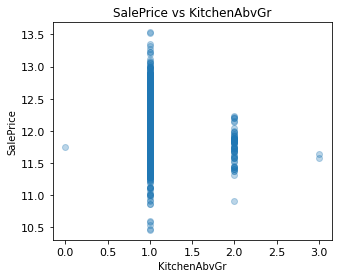

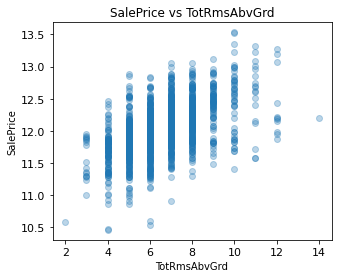

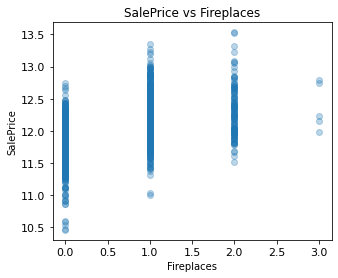

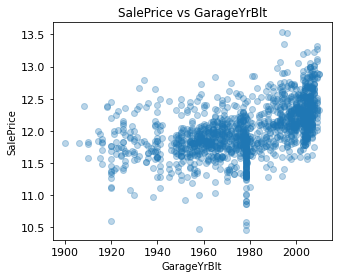

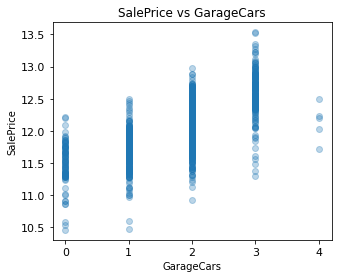

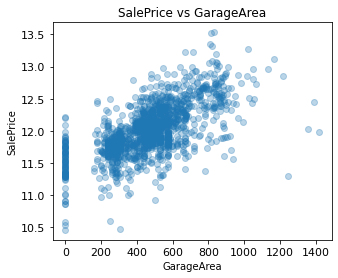

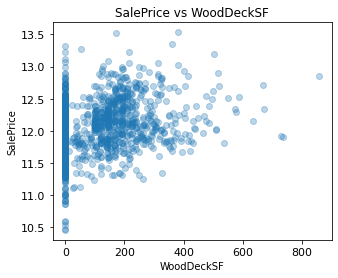

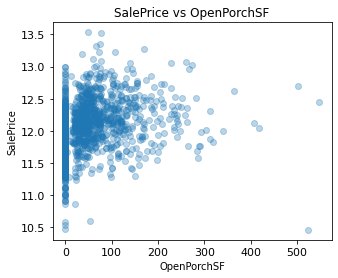

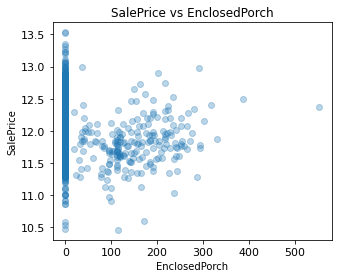

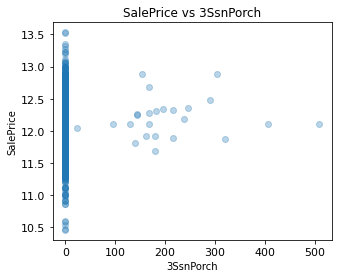

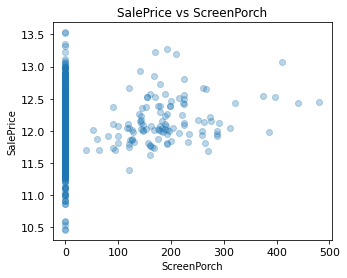

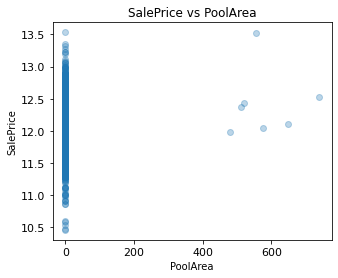

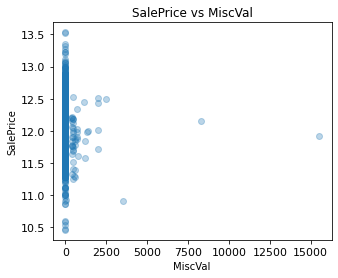

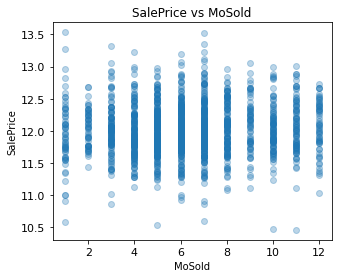

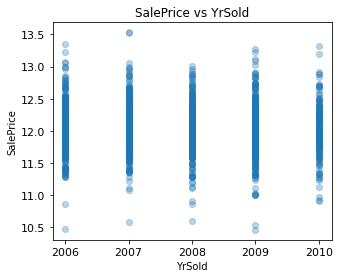

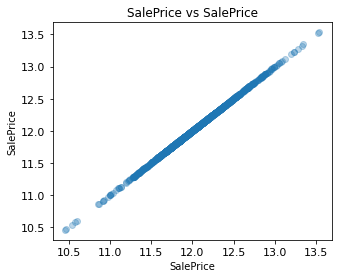

In [23]:
for features in housing_num.columns.values:
    plt.figure(figsize=(5,4))
    plt.scatter(housing_num[features],housing_num['SalePrice'], alpha = 0.3)
    plt.title("SalePrice vs "+str(features))
    plt.xlabel(str(features))
    plt.ylabel('SalePrice')
plt.show()

###  There are some derived Metric present in the dataset lets treat them 


In [24]:
# Converting years to age
housing_num['YearBuilt_Age'] = housing_num['YearBuilt'].max() - housing_num['YearBuilt']
housing_num['YearRemodAdd_Age'] = housing_num['YearRemodAdd'].max() - housing_num['YearRemodAdd']
housing_num['YrSold_Age'] = housing_num['YrSold'].max() - housing_num['YrSold']
housing_num['GarageYrBlt_Age'] = housing_num['GarageYrBlt'].max() - housing_num['GarageYrBlt']

# Dropping columns
housing_num.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [25]:
housing_num[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head(10)

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,7,7,2,7.0
1,34,34,3,34.0
2,9,8,2,9.0
3,95,40,4,12.0
4,10,10,2,10.0
5,17,15,1,17.0
6,6,5,3,6.0
7,37,37,1,37.0
8,79,60,2,79.0
9,71,60,2,71.0


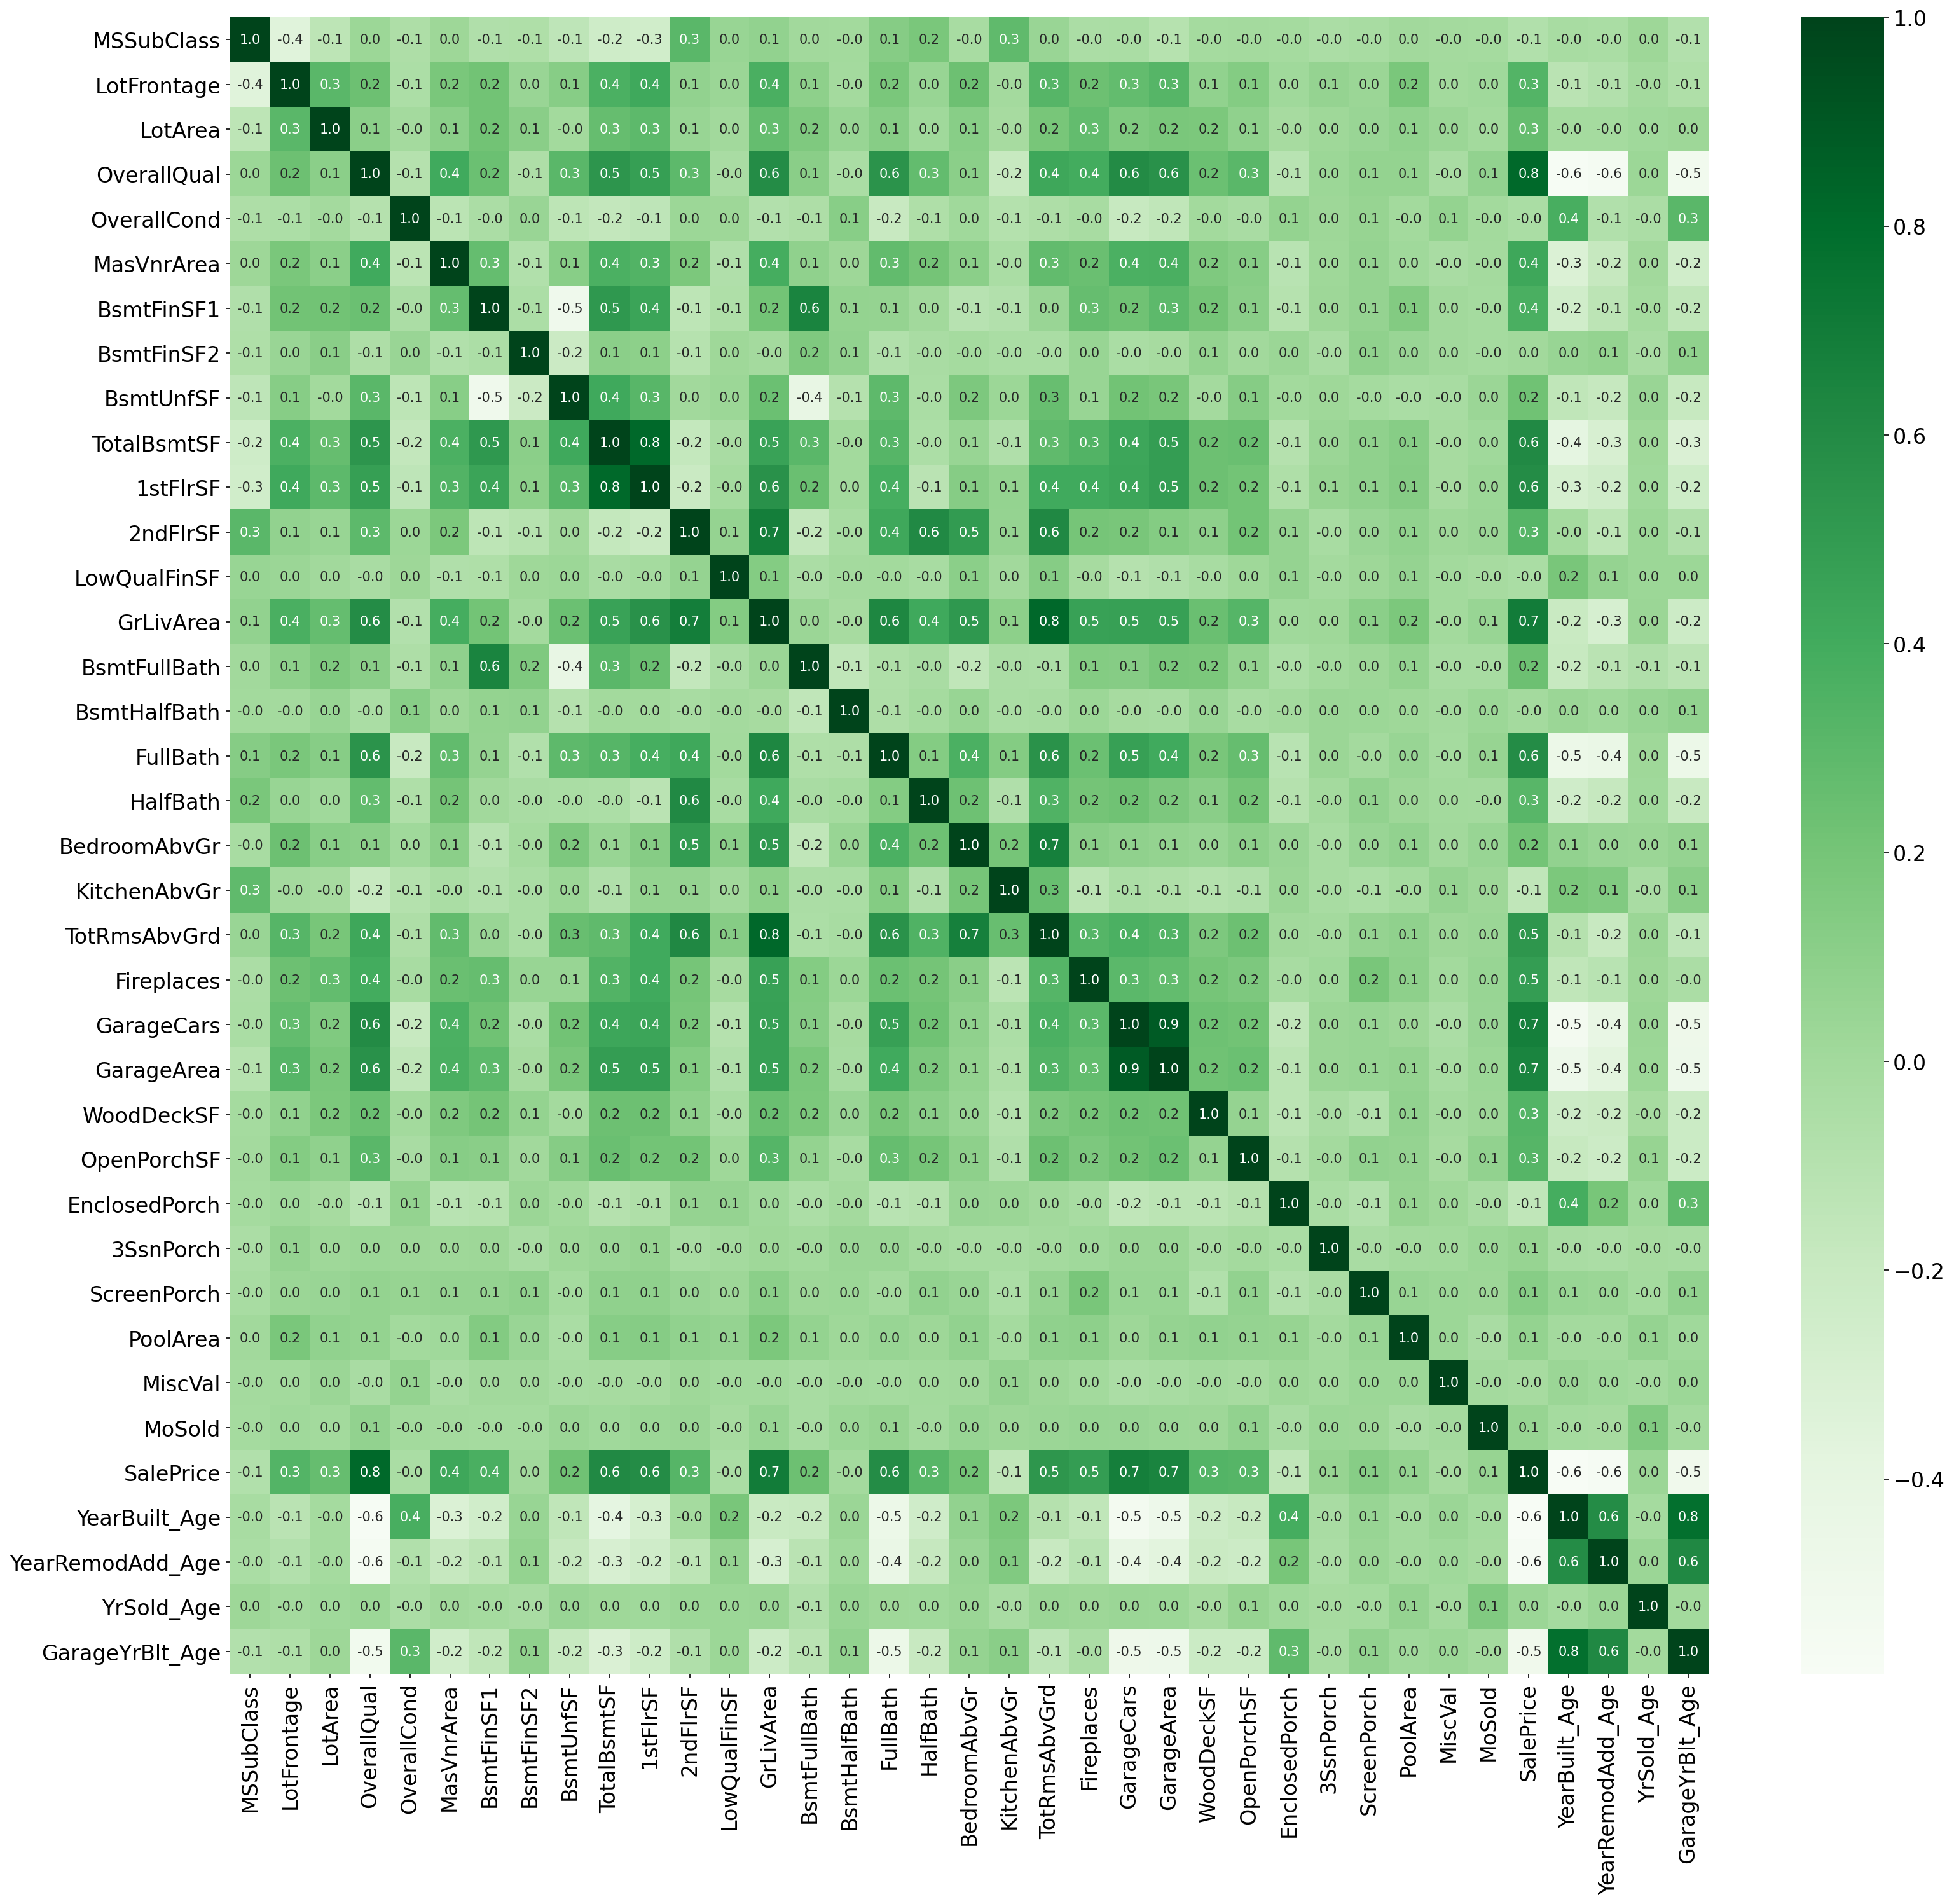

In [26]:
fig = plt.figure(figsize=(25,23),dpi=150)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
sns.heatmap(housing_num.corr(), annot = True, cmap="Greens",fmt='.1f')
plt.show()

### Insights 


- from the above correlation heatmap we have analysed that there are some multi colinearity is going on on a high scale with the target variable "saleprice"
- they are as follows 

                   1.OverallQual-0.8
                   2.TotalBsmtSF-0.6       
                   3.1stFlrSF   -0.6
                   4.GrLivArea  -0.6       
                   5.FullBath   -0.7 
                   6.GarageCars -0.7
                   7.GarageArea -0.7
                   

        
- All the above variables have colinnearity threshhold more than 0.5 so we need to eliminate these features
        
- there are few other variables who shows the multicolinearity among themselves 
-  they are as follows
`
                     1.TotalBsmtSF & 1stFlrSF
                     2.GarageCars & GarageArea
                     3.YearBuilt_Age & YearRemodAdd_age
                     4.YearBuilt_Age   & GarageYrBlt_Age  

   `
  - we need to drop these variables as well
                   
                     
                                


In [27]:
#removing the features 
housing_num.drop(columns=['GarageArea','GarageYrBlt_Age','YearRemodAdd_Age','1stFlrSF','TotRmsAbvGrd','YearBuilt_Age','YrSold_Age'],inplace=True)
     

##### There are few columns who are highly un correlated withe the target variable concluded both from the scatter plot and heatmap 
they are 
`'YrSold','MoSold','PoolArea','LowQualFinSF','MSSubClass','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal''

In [28]:
#dropping those non coreelated varibles
housing_num.drop(columns=['PoolArea','LowQualFinSF','MSSubClass','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','BsmtFinSF2','BsmtHalfBath'],inplace=True)
     


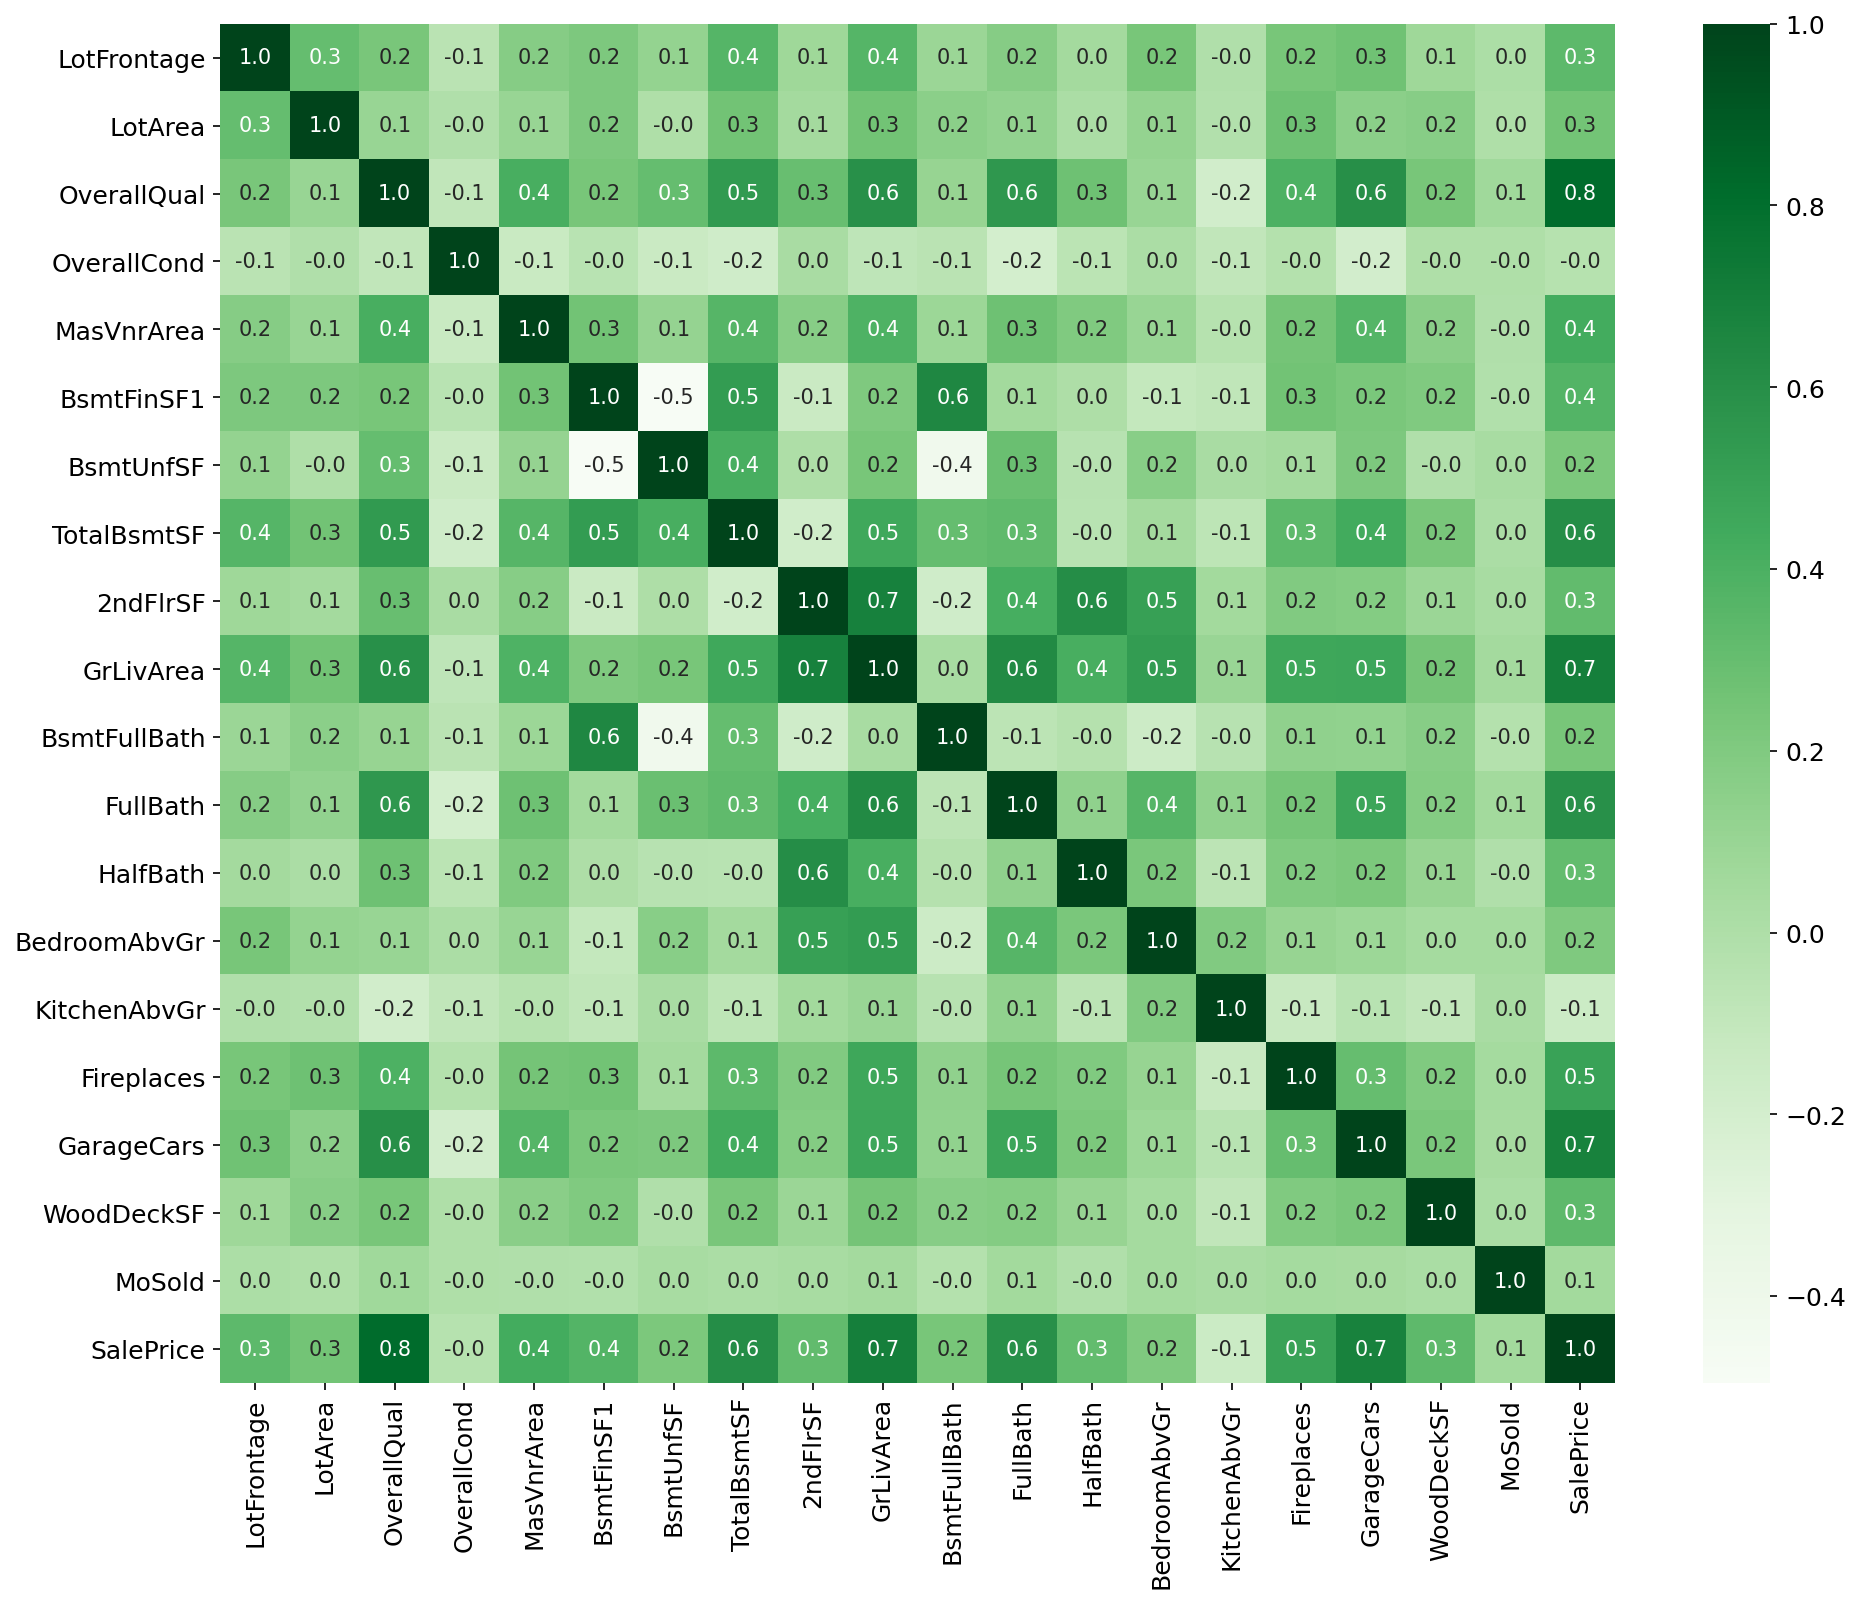

In [29]:
#after doing some manual feature elimination checking heatmap again 
fig = plt.figure(figsize=(15,12),dpi=150)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
sns.heatmap(housing_num.corr(), annot = True, cmap="Greens",fmt='.1f')
plt.show()

## understanding categorical variable 

### checking Null values and impute them 


In [30]:
#checking the null values before imputation present in the numerical dataframe 

for column in housing_obj.columns.values:
    if housing_obj[column].isnull().values.sum() != 0:
        missing_percentage=(housing_obj[column].isnull().values.sum()/len(housing_num))
        print(column, missing_percentage)

Alley 0.9376712328767123
MasVnrType 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [31]:
#chceking the value counts present in each categorical columns 
for i in housing_obj:
    print(i,':\n',housing_obj[i].value_counts(dropna=False),sep='',end='\n--------------------------\n\n')

MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------

Street:
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------

Alley:
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
--------------------------

LotShape:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------

LandContour:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------

Utilities:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------

LotConfig:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------------

LandSlope:
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
--------------------------

Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somer

### we observe that 


1.Alley,PoolQC,Fence,MiscFeature - these variables have very high Null value i.e more than 95 percent so we can drop these from the data set .

2. columns have largely one value present so we can drop these columns as well.they are 
                                `Street,Utilities,'Condition2','RoofMatl','Heating','Functional','PavedDrive','GarageCond','Electrical','LandSlope'

3.There are some Misinterpretation in the dataset so we have done the necessary imputations in the dataset .

In [32]:
# Remove the Columns with Majority NaN Values in it which Include
housing_obj.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],inplace=True)


housing_obj['FireplaceQu'].fillna('No Fireplace',inplace=True)                  
housing_obj['MasVnrType'].fillna(stat.mode(housing_obj['MasVnrType']),inplace=True)   
housing_obj['Electrical'].fillna(stat.mode(housing_obj['Electrical']),inplace=True)   
housing_obj['BsmtQual'].fillna('No Basement',inplace=True)                          
housing_obj['BsmtCond'].fillna('No Basement',inplace=True)                      
housing_obj['BsmtExposure'].fillna('No Basement',inplace=True)               
housing_obj['BsmtFinType1'].fillna('No Basement',inplace=True)           
housing_obj['BsmtFinType2'].fillna('No Basement',inplace=True)                  
housing_obj['GarageType'].fillna('No Garage',inplace=True)                      
housing_obj['GarageFinish'].fillna('No Garage',inplace=True)         
housing_obj['GarageQual'].fillna('No Garage',inplace=True)                      
housing_obj['GarageCond'].fillna('No Garage',inplace=True)                   

In [33]:
#so dropping dominant  variables 
housing_obj.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','Functional','PavedDrive','GarageCond','Electrical','LandSlope','BsmtFinType2'],inplace=True)

In [34]:
#lets check the Null values again after imputation 
housing_obj.isnull().sum()

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
CentralAir       0
KitchenQual      0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
SaleType         0
SaleCondition    0
dtype: int64

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [35]:
# creating dummy variables for categorical variables
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_obj, drop_first=True)
print(housing_dummies.shape)
housing_dummies.head()

(1460, 164)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,

In [36]:
#making the final clean dataset to build the model 
df=pd.concat([housing_num,housing_dummies],axis=1)

### Splitting the Data into Training and Testing Sets

In [37]:
X= df.drop('SalePrice',axis=1)
y= df['SalePrice']

In [38]:
X.shape

(1460, 183)

In [39]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,150,856,854,1710,1,2,1,3,1,0,2,0,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,284,1262,0,1262,0,2,0,3,1,1,2,298,5,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,434,920,866,1786,1,2,1,3,1,1,2,0,9,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,540,756,756,1717,1,1,0,3,1,1,3,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,490,1145,1053,2198,1,2,1,4,1,1,3,192,12,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,

In [40]:
y.shape

(1460,)

In [41]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [42]:
#splitting train and test columns using sklearn library 
np.random.seed(0)
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
#cheking shape of train test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 183)
(438, 183)
(1021,)
(438,)


## Data scaing 

In [44]:
scaler = StandardScaler()

cols=list(housing_num.columns.values)
cols.remove('SalePrice')

X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.123555,-0.473765,-0.779861,0.383154,-0.560537,0.043512,-0.374367,-0.430911,-0.787597,-1.228053,1.066863,-1.026085,-0.751723,-1.042717,-0.234155,-0.925422,-2.366798,-0.743160,-0.832187,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.918688,-0.056845,0.649651,-0.533005,0.807462,1.160345,-0.454644,0.621579,2.140556,2.123103,1.066863,0.786428,1.246998,1.396261,-0.234155,0.623522,1.645101,1.989482,-0.832187,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
239,-0.803279,-0.169324,-0.065105,-1.449164,-0.560537,-0.761296,0.171964,-0.712011,0.795996,-0.056465,-0.837450,-1.026085,1.246998,0.176772,-0.234155,0.623522,-1.029498,-0.743160,-0.832187,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
986,-0.486074,-0.502297,-0.065105,2.215472,-0.560537,-0.963574,-0.175904,-1.256778,0.669584,0.221858,-0.837450,-1.026085,-0.751723,-1.042717,-0.234155,-0.925422,-1.029498,2.423490,-0.104424,0,0,0,1,0,0,1,0,0,1,0,0,0,0

In [45]:
y_train.head()

210     11.492733
318     12.468441
239     11.635152
986     11.669938
1416    11.715874
Name: SalePrice, dtype: float64

In [46]:
X_test[cols] = scaler.fit_transform(X_test[cols])
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.491490,-0.173195,-1.574844,0.377745,-0.615925,0.420867,-0.769869,-0.473033,-0.810589,-1.268092,-0.778198,-1.023721,-0.782546,0.133271,-0.152394,-1.011862,0.321299,-0.771409,-0.541085,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
57,0.833941,0.114799,0.657459,-0.483986,-0.615925,-0.996087,0.667564,-0.483360,1.148506,0.410443,-0.778198,0.799002,1.187312,0.133271,-0.152394,-1.011862,0.321299,-0.771409,0.614990,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
780,-0.354377,-0.295688,0.657459,-0.483986,-0.384419,-0.996087,1.553042,0.489962,-0.810589,-0.505300,-0.778198,0.799002,-0.782546,0.133271,-0.152394,0.548686,0.321299,0.956863,-0.155727,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
382,0.376896,-0.146519,0.657459,-0.483986,-0.615925,-0.996087,0.853115,-0.279402,1.143950,0.561432,-0.778198,0.799002,1.187312,0.133271,-0.152394,-1.011862,0.321299,0.359824,-0.926444,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,

## Model Building

### RFE

`First we will go with RFE for feature selaction of top 40 features and build a basic Regression Model `


In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.feature_selection import RFE
rfe = RFE(linreg, 40)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

[False False  True False False False False False False  True False False
 False False False False False False False  True  True  True  True False
 False False  True  True  True False False False False False False False
  True False  True  True False False False False False False False  True
  True False False False False  True  True False  True False  True  True
 False False False False False False False  True  True False False False
 False False False False False False False False False False  True  True
  True False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False  True False False False
 False False False  True False  True  True  True  True False  True False
 False  True False False False False False False  True False  True False
 False False False  True False False False False False False False False
 False False False False False False False False Fa

In [48]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosA', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior2nd_CBlock', 'ExterCond_Fa', 'Foundation_Stone', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtCond_No Basement', 'BsmtExposure_Gd', 'BsmtFinType1_No Basement',
       'BsmtFinType1_Unf', 'CentralAir_Y', 'GarageQual_Fa',
       'GarageQual_No Garage', 'GarageQual_Po', 'SaleType_ConLD'],
      dtype='object')

In [49]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train[list(col)])

In [50]:
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        23:47:33   Log-Likelihood:                 552.59
No. Observations:                1021   AIC:                            -1029.
Df Residuals:                     983   BIC:                            -841.9
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Ridge Regression - L2

In [51]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation :

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results[['param_alpha','params','mean_test_score','mean_train_score']]

,param_alpha,params,mean_test_score,mean_train_score
0,0.0001,{'alpha': 0.0001},-0.100596,-0.074423
1,0.001,{'alpha': 0.001},-0.100578,-0.074424
2,0.01,{'alpha': 0.01},-0.100405,-0.074427
3,0.05,{'alpha': 0.05},-0.099768,-0.074461
4,0.1,{'alpha': 0.1},-0.099153,-0.074511
5,0.2,{'alpha': 0.2},-0.098280,-0.074622
6,0.3,{'alpha': 0.3},-0.097639,-0.074731
7,0.4,{'alpha': 0.4},-0.097128,-0.074829
8,0.5,{'alpha': 0.5},-0.096718,-0.074924
9,0.6,{'alpha': 0.6},-0.096366,-0.075017


In [53]:
model_cv.best_params_

{'alpha': 10.0}

In [54]:
model_cv.best_score_

-0.09248710816878476

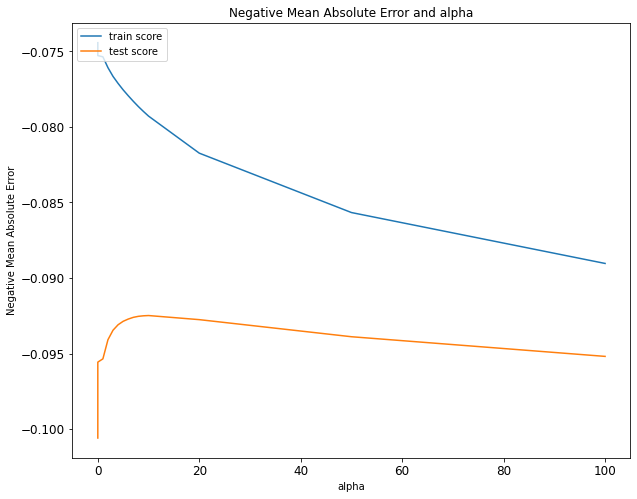

In [55]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [56]:
alpha = 10.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred_ridge_train=ridge.predict(X_train)
print('Train R2 Square : ',round(r2_score(y_train,y_pred_ridge_train),2))
y_pred_ridge_test=ridge.predict(X_test)
print('Test R2 Square : ',round(r2_score(y_test,y_pred_ridge_test),2))

Train R2 Square :  0.91
Test R2 Square :  0.89


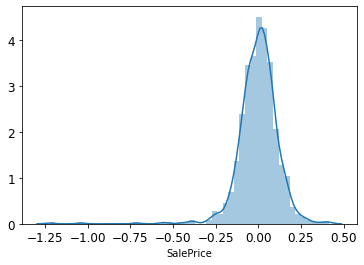

In [57]:
sns.distplot((y_train-y_pred_ridge_train))

In [58]:
#Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coef = list(zip(cols, model_parameters))
var_coef = [x for x in var_coef if abs(x[-1] != 0)]
var_coef

[('constant', 11.82),
 ('LotFrontage', -0.01),
 ('LotArea', 0.02),
 ('OverallQual', 0.09),
 ('OverallCond', 0.04),
 ('BsmtFinSF1', -0.01),
 ('TotalBsmtSF', 0.01),
 ('2ndFlrSF', 0.01),
 ('GrLivArea', 0.1),
 ('BsmtFullBath', 0.03),
 ('FullBath', 0.02),
 ('HalfBath', 0.02),
 ('BedroomAbvGr', 0.02),
 ('KitchenAbvGr', -0.02),
 ('GarageCars', 0.05),
 ('WoodDeckSF', 0.01),
 ('MSZoning_FV', 0.05),
 ('MSZoning_RH', 0.05),
 ('MSZoning_RL', 0.06),
 ('MSZoning_RM', 0.01),
 ('LotShape_IR2', 0.03),
 ('LotShape_IR3', -0.04),
 ('LandContour_HLS', 0.04),
 ('LandContour_Low', 0.05),
 ('LandContour_Lvl', 0.05),
 ('LotConfig_CulDSac', 0.03),
 ('LotConfig_FR2', -0.04),
 ('LotConfig_FR3', -0.01),
 ('LotConfig_Inside', -0.01),
 ('Neighborhood_Blueste', -0.01),
 ('Neighborhood_BrDale', -0.03),
 ('Neighborhood_ClearCr', 0.05),
 ('Neighborhood_Crawfor', 0.11),
 ('Neighborhood_Edwards', -0.08),
 ('Neighborhood_Gilbert', -0.02),
 ('Neighborhood_IDOTRR', -0.07),
 ('Neighborhood_MeadowV', -0.06),
 ('Neighborhood_Mi

In [59]:
df1 = {'Feature':list(list(zip(*var_coef))[0]),'Coeff':list(list(zip(*var_coef))[1])}
ridge_params = pd.DataFrame(data = df1)


In [60]:
ridge_params.reindex(ridge_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,11.82
32,Neighborhood_Crawfor,0.11
8,GrLivArea,0.10
42,Neighborhood_NridgHt,0.09
3,OverallQual,0.09
46,Neighborhood_Somerst,0.08
33,Neighborhood_Edwards,-0.08
58,BldgType_Twnhs,-0.08
35,Neighborhood_IDOTRR,-0.07
50,Condition1_Norm,0.07


## Lasso Regularization - L1

In [61]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha','params','mean_test_score','mean_train_score']]

,param_alpha,params,mean_test_score,mean_train_score
0,0.0001,{'alpha': 0.0001},-0.094679,-0.075278
1,0.001,{'alpha': 0.001},-0.093897,-0.083818
2,0.01,{'alpha': 0.01},-0.107203,-0.103690
3,0.05,{'alpha': 0.05},-0.137040,-0.135617
4,0.1,{'alpha': 0.1},-0.165778,-0.165015
5,0.2,{'alpha': 0.2},-0.234912,-0.233913
6,0.3,{'alpha': 0.3},-0.296429,-0.295690
7,0.4,{'alpha': 0.4},-0.310645,-0.310052
8,0.5,{'alpha': 0.5},-0.310645,-0.310052
9,0.6,{'alpha': 0.6},-0.310645,-0.310052


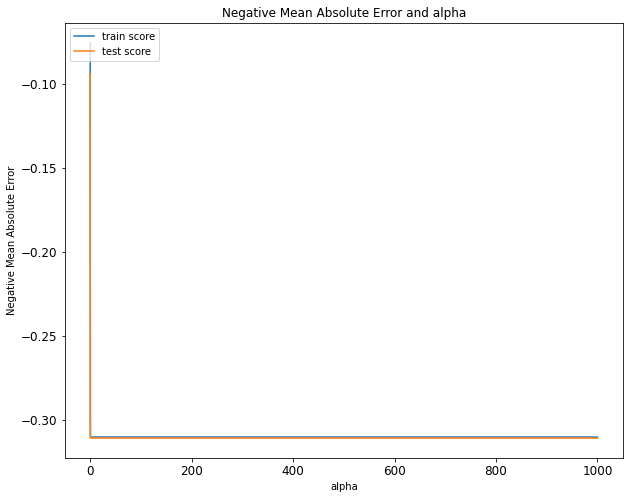

In [63]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [64]:
model_cv.best_params_

{'alpha': 0.001}

In [65]:
model_cv.best_score_

-0.0938972921547676

In [66]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_pred_lasso_train=lasso.predict(X_train)
print('Train R2 Square : ',round(r2_score(y_train,y_pred_lasso_train),2))
y_pred_lasso_test=lasso.predict(X_test)
print('Test R2 Square : ',round(r2_score(y_test,y_pred_lasso_test),2))
#lasso.coef_

Train R2 Square :  0.92
Test R2 Square :  0.88


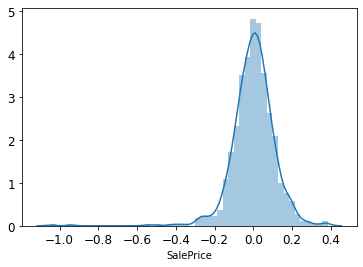

In [67]:
sns.distplot((y_train-y_pred_lasso_train))

In [68]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 11.544),
 ('LotFrontage', -0.015),
 ('LotArea', 0.015),
 ('OverallQual', 0.072),
 ('OverallCond', 0.041),
 ('MasVnrArea', -0.005),
 ('BsmtFinSF1', -0.006),
 ('BsmtUnfSF', 0.006),
 ('TotalBsmtSF', 0.004),
 ('2ndFlrSF', 0.003),
 ('GrLivArea', 0.113),
 ('BsmtFullBath', 0.027),
 ('FullBath', 0.022),
 ('HalfBath', 0.018),
 ('BedroomAbvGr', 0.02),
 ('KitchenAbvGr', -0.013),
 ('Fireplaces', -0.01),
 ('GarageCars', 0.048),
 ('WoodDeckSF', 0.01),
 ('MoSold', -0.001),
 ('MSZoning_FV', 0.292),
 ('MSZoning_RH', 0.337),
 ('MSZoning_RL', 0.308),
 ('MSZoning_RM', 0.274),
 ('LotShape_IR2', 0.036),
 ('LotShape_IR3', -0.047),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.075),
 ('LandContour_Low', 0.105),
 ('LandContour_Lvl', 0.084),
 ('LotConfig_CulDSac', 0.027),
 ('LotConfig_FR2', -0.066),
 ('LotConfig_FR3', -0.029),
 ('LotConfig_Inside', -0.013),
 ('Neighborhood_BrDale', -0.042),
 ('Neighborhood_ClearCr', 0.089),
 ('Neighborhood_CollgCr', 0.02),
 ('Neighborhood_Crawfor', 0.166),
 ('N

In [69]:
df2 = {'Feature':list(list(zip(*var_coef))[0]),'Coeff':list(list(zip(*var_coef))[1])}
lasso_params = pd.DataFrame(data = df2)


In [70]:
lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,11.82
32,Neighborhood_Crawfor,0.11
8,GrLivArea,0.10
42,Neighborhood_NridgHt,0.09
3,OverallQual,0.09
46,Neighborhood_Somerst,0.08
33,Neighborhood_Edwards,-0.08
58,BldgType_Twnhs,-0.08
35,Neighborhood_IDOTRR,-0.07
50,Condition1_Norm,0.07


In [71]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.91
r2_score for lasso: 0.92
r2_score in test dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.88


# Inferences


`we have done both Ridge and Lasso Regression in the dataset 
we have concluded top 10 variables which manupulates the price of houses and can be used to the best for our business purpose `

`so the predictor variables we got from Ridge Regularization ` :

                            1.MSZoning(RH,RM,FV,RL)
                            2.SaleType_ConLD
                            3.Neighborhood_(Crawfor,MeadowV,StoneBr,Somerst)
                            4.GrLivArea
                            6.LandContour_Low
                            7.Exterior1st_BrkFace
                            8.KitchenQual_Fa
                            9.OverallQual`
                           

                            
  `The predictor variables from Lasso Regularization :`
  
                           
                            1.MSZoning(RH,RM,FV,RL)
                            2.SaleType_ConLD
                            3.Neighborhood_(Crawfor,MeadowV,StoneBr,Somerst)
                            4.GrLivArea
                            5.BldgType_Twnhs
                            6.LandContour_Low
                            7.GarageQual_Gd
                            8.KitchenQual_Fa
                            9.OverallQual
                            10.Exterior1st_BrkFace
                           `
         

# Assignment Questions and answers 

`What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?`

`What is the optimal value of alpha for ridge and lasso regression?`


`The optimal values of lambda i.e alpha for Ridge =10
The optimal values of lambda i.e alpha for Lasso=0.001`

In [72]:
#lets make the alpha double and compare the outcome for Ridge
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred_ridge_train=ridge.predict(X_train)
print(round(r2_score(y_train,y_pred_ridge_train),2))
y_pred_ridge_test=ridge.predict(X_test)
print(round(r2_score(y_test,y_pred_ridge_test),2))

0.91
0.89


In [73]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df3 = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df3['B-Coeff']=df3['B-Coeff'].abs()
df3=df3.sort_values(by=['B-Coeff'],ascending=False)
df3


,Features,B-Coeff
0,constant,11.857
10,GrLivArea,0.094
3,OverallQual,0.092
38,Neighborhood_Crawfor,0.084
39,Neighborhood_Edwards,0.071
48,Neighborhood_NridgHt,0.070
67,BldgType_Twnhs,0.061
53,Neighborhood_Somerst,0.061
58,Condition1_Norm,0.059
143,CentralAir_Y,0.055


In [74]:
print('Top 5 Predictor Variables using Ridge after Doubling the Alpha :',df3[1:6].values)

Top 5 Predictor Variables using Ridge after Doubling the Alpha : [['GrLivArea' 0.094]
 ['OverallQual' 0.092]
 ['Neighborhood_Crawfor' 0.084]
 ['Neighborhood_Edwards' 0.071]
 ['Neighborhood_NridgHt' 0.07]]


In [75]:
#for Lasso doubling the value of alpha
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
y_pred_lasso_train=lasso.predict(X_train)
print(round(r2_score(y_train,y_pred_lasso_train),2))
y_pred_lasso_test=lasso.predict(X_test)
print(round(r2_score(y_test,y_pred_lasso_test),2))

0.89
0.88


In [76]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df['B-Coeff']=df['B-Coeff'].abs()
df=df.sort_values(by=['B-Coeff'],ascending=False)
print('Top 5 Predictor Variables using Lasso after Doubling the Alpha :',df[1:6].values)


Top 5 Predictor Variables using Lasso after Doubling the Alpha : [['OverallQual' 0.109]
 ['GrLivArea' 0.098]
 ['Neighborhood_Somerst' 0.07]
 ['CentralAir_Y' 0.068]
 ['Neighborhood_NridgHt' 0.061]]


` 2 Question 2`

 `You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which o   one will you choose to apply and why? `

`We have performed both Lasso and Ridge and it is very much evnident that we should use Lasso over Ridge as `
      - Ridge dont dont do feature elimination and takes all teh varible into consideration where as Lasso do feature elimination by means of applying hard penality making the coeeficient  to shink to absolute zero but Ridge minimises  the coeeficient tend to zero .
      
      -So lasso makes the model more simple and deduct the unnecessary columns for large datasets 
      
      -So here we are gonna use Lasso over Ridge 
      
      

`Question 3`

`After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?`

In [77]:
X_train=X_train.drop(['Neighborhood_Crawfor','GrLivArea' , 'Neighborhood_NridgHt', 'OverallQual', 'Neighborhood_Somerst'],axis=1)
X_test=X_test.drop(['Neighborhood_Crawfor','GrLivArea' , 'Neighborhood_NridgHt', 'OverallQual', 'Neighborhood_Somerst'],axis=1)

In [78]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha','params','mean_test_score','mean_train_score']]

,param_alpha,params,mean_test_score,mean_train_score
0,0.0001,{'alpha': 0.0001},-0.107075,-0.083023
1,0.001,{'alpha': 0.001},-0.107611,-0.095090
2,0.01,{'alpha': 0.01},-0.121968,-0.118296
3,0.05,{'alpha': 0.05},-0.160545,-0.159352
4,0.1,{'alpha': 0.1},-0.194534,-0.194057
5,0.2,{'alpha': 0.2},-0.273090,-0.272448
6,0.3,{'alpha': 0.3},-0.310645,-0.310052
7,0.4,{'alpha': 0.4},-0.310645,-0.310052
8,0.5,{'alpha': 0.5},-0.310645,-0.310052
9,0.6,{'alpha': 0.6},-0.310645,-0.310052


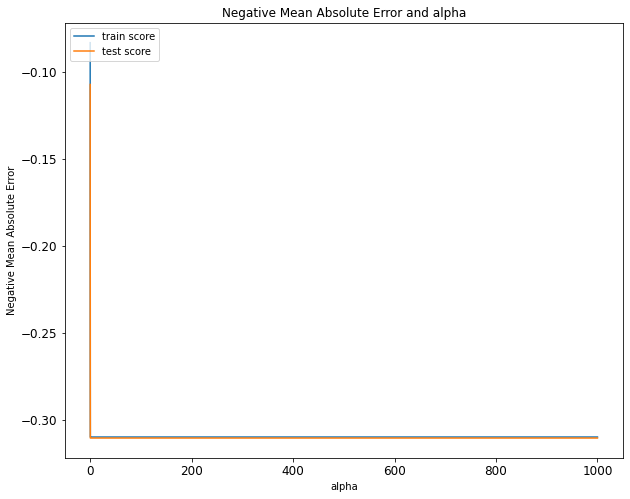

In [80]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [81]:
model_cv.best_params_

{'alpha': 0.0001}

In [82]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
y_pred_lasso_train=lasso.predict(X_train)
print('Train R2 Square : ',round(r2_score(y_train,y_pred_lasso_train),2))
y_pred_lasso_test=lasso.predict(X_test)
print('Test R2 Square : ',round(r2_score(y_test,y_pred_lasso_test),2))

Train R2 Square :  0.91
Test R2 Square :  0.87


In [83]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df['B-Coeff']=df['B-Coeff'].abs()
df=df.sort_values(by=['B-Coeff'],ascending=False)

In [84]:
print('Top 5 Predictor Variables using Lasso after Droping 5 Important Predictor Variables :',df[1:6].values)

Top 5 Predictor Variables using Lasso after Droping 5 Important Predictor Variables : [['MoSold' 0.375]
 ['Neighborhood_Edwards' 0.347]
 ['WoodDeckSF' 0.329]
 ['MSZoning_FV' 0.323]
 ['MSZoning_RH' 0.308]]
